In [58]:
import numpy as np
import scipy.misc
import scipy.integrate as integrate
import math 
from matplotlib import pylab as plt

#ф-я выводит значение р. Маклорена степени n в т. х
def maclaurin(x,f,n,l):
    f_maclaurin = f(0)
    for i in range(1,n+1):
        f_maclaurin += scipy.misc.derivative(f,0,i)*(x**i)/math.factorial(i)
    return f_maclaurin

#ф-я выводит графики f и ряда f степени n на отрезке [a,b], их аргументы берутся с шагом step
def function(f,a,b,l,step,series,n):
    x = np.arange(a,b,step)
    y = f(x)
    y_series = series(x,f,n,l)
    
    plt.plot(x,y,'b', label='f')
    plt.plot(x,y_series,'g',label='series')
    plt.legend()  
    #plt.axis([0,100,0,100])

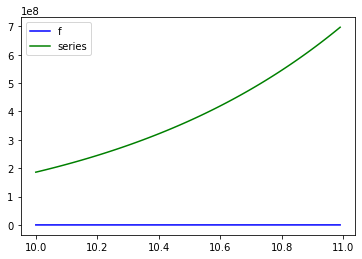

In [59]:
function(np.exp,10,11,1,0.01,maclaurin,15)

Видно, что на отрезке [0,1] функция приближается хорошо, а на [10,11]  - плохо => предлагается приближать р. Фурье

In [60]:
def fourier_coefficient(f,l,n):
    bk = []
    f_i = lambda f,x,n,l: f(x)*sin(np.pi*n*x/l)  
    for i in range(1,n+1):
        f_i = lambda x: f(x)*np.sin(np.pi*i*x/l)  
        bk.append(2*integrate.quad(f_i,0,l)[0]/l)  
    return bk
    
def fourier(x,f,n,l):
    f_fourier = 0
    bk = fourier_coefficient(f,l,n)
    for i in range(1,n+1):
        f_fourier += bk[i-1]*np.sin(np.pi*i*x/l)
    return f_fourier    

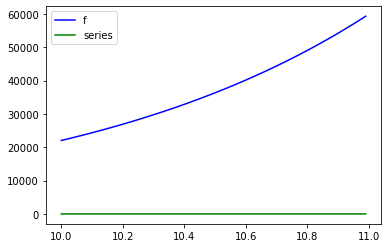

In [61]:
function(np.exp,10,11,1,0.01,fourier,15)

In [49]:
fourier_coefficient(np.exp,11,5)

[2874.6675930740034,
 -4688.4067021034425,
 5378.825634031036,
 -5395.132389984186,
 5115.115273424566]

In [54]:
fourier(10,np.exp,10,11)

32000.25360197111

In [55]:
np.exp(10)

22026.465794806718

In [57]:
maclaurin(10,np.exp,10,1)

4955562.369375126